<a href="https://colab.research.google.com/github/mahbubcsedu/interviewcoding/blob/main/recursion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# without helper function
def generate_power_set(input_set):

  def backtrack(idx, temp):
      if idx == len(input_set):
         res.append(list(temp))
         return
      # recursion tree has two path, one with the current item picked and another is current item skipped
      backtrack(idx+1, temp)
      temp = temp + [input_set[idx]]
      backtrack(idx + 1, temp)

  res = []
  backtrack(0,[])

  return res


res = generate_power_set(['a','b'])
print(res)


b
a
b
[[], ['b'], ['a'], ['a', 'b']]


The recursion will be easy to visualize if we use smaller input. For input [a,b] the event is as follows
* ds1(0+1, [])  -> []
* ds1(1+1, [])  -> []
* res ->  [[]]
* ds2(1+1, [b])
* res -> [[]]
* res -> [[], ['b']]
* ds2(0+1, a)
* res -> [[], ['b']]
* ds(1+1, a)
* res -> [[], ['b']]
* res -> [[], ['b'], ['a']]
* ds2(1+1, a b)
* res -> [[], ['b'], ['a']]
* res -> [[], ['b'], ['a'], ['a', 'b']]




In [ ]:
import math

def generate_power_set(S):
  power_set = []
  # loop over [0, 2^n-1]
  for int_for_subset in range(1 << len(S)):
    bit_array = int_for_subset
    subset = []
    print("for number", bit_array)

    while bit_array:
      print(int(math.log2(bit_array & ~(bit_array-1))))
      subset.append(S[int(math.log2(bit_array & ~(bit_array-1)))])
      bit_array &=bit_array-1
    # print(subset)
    power_set.append(subset)
  return power_set

res= generate_power_set([1,2,3])
print(res, '')

for number 0
for number 1
0
for number 2
1
for number 3
0
1
for number 4
2
for number 5
0
2
for number 6
1
2
for number 7
0
1
2
[[], [1], [2], [1, 2], [3], [1, 3], [2, 3], [1, 2, 3]] 


In [ ]:
from typing import List
def subsets( nums: List[int]) -> List[List[int]]:
        n = len(nums)
        output = []

        # if we have a set of 2, then we need only 2^2 to 2^3 or [4,5,6,7] or only 4 possible subsets. 0 to 2^2-1 those only be represnted by 2 bits [00, 01,10,11]
        for i in range(1 << len(nums)):
            # generate bitmask, from 0..00 to 1..11
            # bin(i) is the binary representation of i
            bitmask = str(bin(i)[2:]).zfill(len(nums))

            # print(i, str(bin(i)[3:]).zfill(len(nums)))

            # append subset corresponding to that bitmask
            output.append([nums[j] for j in range(n) if bitmask[j] == '1'])

        return output
subsets([1,2,3])

0 000
1 000
2 000
3 001
4 000
5 001
6 010
7 011


[[], [3], [2], [2, 3], [1], [1, 3], [1, 2], [1, 2, 3]]

In [ ]:
# using helper function
def generate_power_set(S):

  # print(len(S))
  def helper(start, temp, ps):
    # print(start)
    # if(start==len(S)):
    # print(ps)
    ps.append(list(temp)) # append should be list temp is list and it will append to ps list
    # print(ps)
      # return

    for i in range(start, len(S)):
      temp.append(S[i])
      helper(i+1, temp, ps)
      temp.pop()
  # return
  ps = []
  helper(0,[], ps)
  return ps
res= generate_power_set(['a','b','c'])
# print(res)
print(sorted(res,key=len))

[[], ['a'], ['a', 'b'], ['a', 'b', 'c'], ['a', 'c'], ['b'], ['b', 'c'], ['c']]
[[], ['a'], ['b'], ['c'], ['a', 'b'], ['a', 'c'], ['b', 'c'], ['a', 'b', 'c']]


## Find all combination of size k from an array

In [ ]:
# using helper function
def combination(S, k):

  # print(len(S))
  # we can use idx to keep it a pattern instead of giving different name and then get confused about the backtrack
  def helper(start, temp, ps, k):
    # print(start)
    # if(start==len(S)):
    # print(ps)
    if len(temp) == k:
      ps.append(list(temp)) # append should be list temp is list and it will append to ps list
      return

    # print(ps)
      # return

    for i in range(start, len(S)):
      temp.append(S[i])
      helper(i+1, temp, ps, k)
      temp.pop()
  # return
  ps = []
  helper(0,[], ps, k)
  return ps
res= combination(['a','b','c'], 2)
# print(res)
print(sorted(res,key=len))

[['a', 'b'], ['a', 'c'], ['b', 'c']]


In [ ]:
# prompt: generate all combination of size k from an array of size n when items can have duplicate

from typing import List


def combinations_with_replacement(nums: List[int], k: int) -> List[List[int]]:
    n = len(nums)
    result = set()

    def backtrack(combination, start_index, counter):
        if len(combination) == k:
            result.add(tuple(combination.copy()))
            return

        for i in range(start_index, n):
          if counter[nums[i]] > 0:
            combination.append(nums[i])
            counter[nums[i]] -= 1
            backtrack(combination, i+1, counter)
            counter[nums[i]] += 1
            combination.pop()


    counter = Counter(nums)
    backtrack([], 0, counter)
    return result


# Example usage:
nums = [1, 2, 3, 3]
k = 2
combinations = combinations_with_replacement(nums, k)
combinations

{(1, 2), (1, 3), (2, 3), (3, 3)}

## Find combination from 1 to n with k item

In [ ]:
def combinations(n, k):
    def directed_combinations(offset, partial_combination):
        if len(partial_combination) == k:
            result.append(list(partial_combination))
            return

        # Generate remaining combinations over {offset, ..., n - 1} of size
        # num_remaining.
        num_remaining = k - len(partial_combination)
        i = offset
        while i <= n and num_remaining <= n - i + 1:
            directed_combinations(i + 1, partial_combination + [i])
            i += 1

    result = []
    directed_combinations(1, [])
    return result
print(combinations(4,2))

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


## Find combination from 1 to n with k item

In [ ]:

from typing import List
class Solution:
    def combine(self, n: int, k: int) -> List[List[int]]:
        res = []

        def backtrack(start, temp):
            if  len(temp)==k:
                res.append(temp.copy())
                return

            for i in range(start, n+1):
                temp.append(i)
                backtrack(i+1, temp)
                # make sure, we are using i instead of start here,
                # otherwise it will go back to 0 after completing full loop
                temp.pop()

        backtrack(1,[])
        return res
obj = Solution()
print(obj.combine(4,2))

[[1, 2], [1, 3], [1, 4], [2, 3], [2, 4], [3, 4]]


# Generate all permutations


In [ ]:
from typing import List

def allPermutations(nums: List[int]) -> List[List[int]]:
  def backtrack(idx):
    if len(nums)-1 == idx:
      result.append(nums.copy())
      return

    for i in range(idx, len(nums)):
      nums[i], nums[idx] = nums[idx], nums[i]
      backtrack(idx+1)
      nums[i], nums[idx] = nums[idx], nums[i]

  result = []
  backtrack(0)
  return result
all_perms = allPermutations([1,2,4])
print(all_perms)

[[1, 2, 4], [1, 4, 2], [2, 1, 4], [2, 4, 1], [4, 2, 1], [4, 1, 2]]


In [ ]:
# prompt: generate permutation from an array of items when items can have duplicate using backtracking

from typing import List, Counter


def generate_permutations_with_duplicates(nums: List[int]) -> List[List[int]]:
    def backtrack(combination, counter):
        if len(combination) == len(nums):
            result.append(list(combination))
            return

        for num in counter:
            if counter[num] > 0:
                combination.append(num)
                counter[num] -= 1
                backtrack(combination, counter)
                counter[num] += 1
                combination.pop()

    result = []
    counter = Counter(nums)

    backtrack([], counter)
    return result


# Example usage
nums = [1, 1, 2]
permutations = generate_permutations_with_duplicates(nums)
permutations

[[1, 1, 2], [1, 2, 1], [2, 1, 1]]

In [ ]:
# prompt: write the same generate_permutations_with_duplicates function with generic data type support

from typing import List, Counter, TypeVar

T = TypeVar('T')

def generate_permutations_with_duplicates(nums: List[T]) -> List[List[T]]:
    def backtrack(combination, counter):
        if len(combination) == len(nums):
            result.append(list(combination))
            return

        for num in counter:
            if counter[num] > 0:
                combination.append(num)
                counter[num] -= 1
                backtrack(combination, counter)
                counter[num] += 1
                combination.pop()

    result = []
    counter = Counter(nums)

    backtrack([], counter)
    return result


# Example usage
nums = [1, 1, 2]
permutations = generate_permutations_with_duplicates(nums)
print(permutations)

# Example using characters
chars = ['a', 'b', 'c']
char_permutations = generate_permutations_with_duplicates(chars)
print(char_permutations)

# example using string
string = "abcc"
string_permutations = generate_permutations_with_duplicates(string)
print(string_permutations)


[[1, 1, 2], [1, 2, 1], [2, 1, 1]]
[['a', 'b', 'c'], ['a', 'c', 'b'], ['b', 'a', 'c'], ['b', 'c', 'a'], ['c', 'a', 'b'], ['c', 'b', 'a']]
[['a', 'b', 'c', 'c'], ['a', 'c', 'b', 'c'], ['a', 'c', 'c', 'b'], ['b', 'a', 'c', 'c'], ['b', 'c', 'a', 'c'], ['b', 'c', 'c', 'a'], ['c', 'a', 'b', 'c'], ['c', 'a', 'c', 'b'], ['c', 'b', 'a', 'c'], ['c', 'b', 'c', 'a'], ['c', 'c', 'a', 'b'], ['c', 'c', 'b', 'a']]


## Generate permutations that support duplicates
If we draw recursion tree, we can see that for duplicate, a new branch is created every time.
There are two options
 1. We can calculate the same way and add it to the set, so if it duplicate, it will avoid, but it does not help improving time
 2. We can use counter for duplicate, and only create one branch for duplicate items

In [ ]:
class Solution:
    def permuteUnique(self, nums: List[int]) -> List[List[int]]:
        res = []
        # counter will create [1,1,2] to {1:2, 2:1}, so, we will have two items instead of three
        # will try to avoid creating duplicate recursion tree with the same elements at first level

        ct = collections.Counter(nums)
        def backtrack(perm, counter):
            if len(perm) == len(nums):
                res.append(perm.copy())

            for n in counter:
                if counter[n]==0:
                    continue
                perm.append(n)
                counter[n] -=1
                backtrack(perm, counter)
                counter[n] +=1
                perm.pop()

        backtrack([], ct)
        return res

## Generate all parenthesis
Follow one pattern to ratain info in your brain

In [ ]:
from typing import List
def generateAllParen(n:int)->List[List[str]]:
  def backtrack(n_left, n_right, pre, res):
    if n_left > 0:
      backtrack(n_left-1, n_right, pre+"(", res)
    if n_left < n_right:
      backtrack(n_left, n_right-1, pre+")", res)

    if not n_right:
      res.append(pre)
    return res
  return backtrack(n,n,"",[])
print(generateAllParen(3))


['((()))', '(()())', '(())()', '()(())', '()()()']


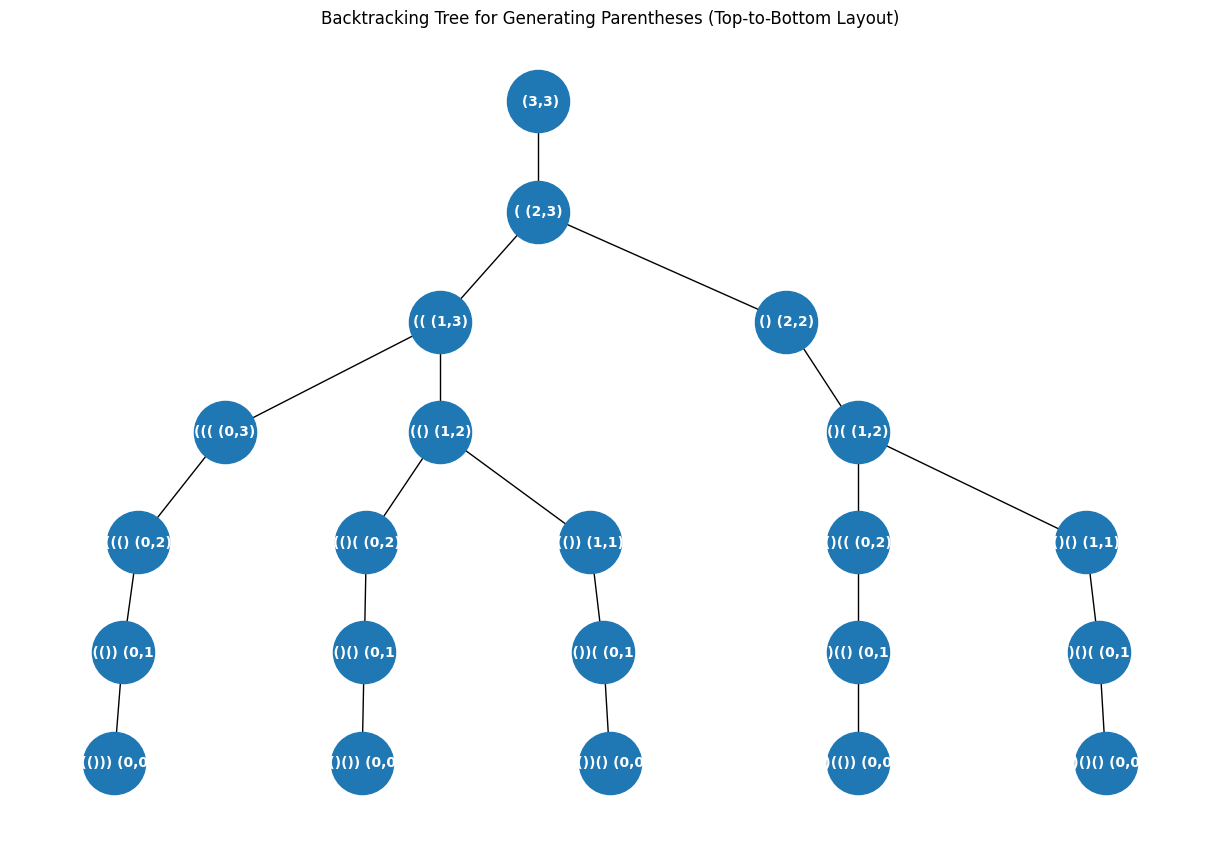

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
from typing import List
from networkx.drawing.nx_pydot import graphviz_layout

def generate_all_paren_tree(n: int) -> nx.DiGraph:
    G = nx.DiGraph()  # Directed graph to show parent-to-child relationship

    def backtrack(n_left, n_right, pre):
        node = f"{pre} ({n_left},{n_right})"
        if node not in G:
            G.add_node(node)  # Add current state as a node

        # Base case: If we have no right parentheses left, the string is complete
        if n_right == 0:
            return

        # If we can still add a `(`, do so and create a corresponding edge
        if n_left > 0:
            next_node = f"{pre + '('} ({n_left-1},{n_right})"
            G.add_edge(node, next_node)
            backtrack(n_left - 1, n_right, pre + "(")

        # If we can add a `)` without violating the validity, do so and create an edge
        if n_left < n_right:
            next_node = f"{pre + ')'} ({n_left},{n_right-1})"
            G.add_edge(node, next_node)
            backtrack(n_left, n_right - 1, pre + ")")

    # Start the backtracking with n left and right parentheses and an empty prefix
    backtrack(n, n, "")
    return G

# Generate the tree and draw it
n = 3  # You can change this value to explore other cases
G = generate_all_paren_tree(n)

plt.figure(figsize=(12, 8))

# Use graphviz_layout to lay out the nodes in a top-to-bottom tree structure
pos = graphviz_layout(G, prog="dot")

# Draw the graph
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_color="white", font_weight="bold", arrows=False)
plt.title("Backtracking Tree for Generating Parentheses (Top-to-Bottom Layout)")
plt.show()


In [ ]:
class Paren:
    def generateParenthesis(self, n: int) -> List[str]:

        def helper(left, right, temp, res):
            if left < right:
                return
            if left==n and right==n: # when reached here, performed n-1 operation and we started from 0,0
                res.append(temp)

            if left <= n: # right parent can never be greater than left
                temp+="("
                helper(left+1, right, temp, res)
                temp=temp[:-1]
            if right < left: #just to make equal number
                temp+=")"
                helper(left, right+1, temp, res)
                temp=temp[:-1]
        res=[]
        helper(0,0,"", res)
        return res

    def generateParenthesis2(self, n: int) -> List[str]:
        if n==0: return ['']
        res = []
        # started from empty, it generates
        for c in range(n):
            for left in self.generateParenthesis2(c):
                for right in self.generateParenthesis2(n-c-1):
                    res.append("("+left+")"+right)
        return res
    def generateParenthesisdp(self, n: int) -> List[str]:
        dp=[[] for _ in range(n+1)] # for each length, we will store the results
        dp[0].append("") # 0 layer will keep empty

        for i in range(n+1):
            for j in range(i):
                dp[i] += ["(" + left + ")" + right for left in dp[j] for right in dp[i-j-1]]

        return dp[n]


## Palindromic decomposition
- $[a, aba]$ is a decomposition of aaba as well as substring.
- $[aaa,bbb]$ $[aa,aabb, b]$ are two of the decomposition of [aaabbb]

In [ ]:
#  palindromic decomposition, there could be multiple decomposition of the same string
# palindromic substring is different than number of decomposition
def palindromicDecomposition(s: str)-> List[List[str]]:
  result = []
  def rec_palindromic_decom(idx, temp):
    if idx == len(s):
      result.append(list(temp))
      return

    for i in range(idx+1, len(s)+1):
      prefix = s[idx:i]
      if prefix == prefix[::-1]:
        rec_palindromic_decom(i, temp + [prefix])

  rec_palindromic_decom(0,[])
  return result


res = palindromicDecomposition("aaa")

print(res)


[['a', 'a', 'a'], ['a', 'aa'], ['aa', 'a'], ['aaa']]


## N-Queen problem
Place N-Queens in a chess board
* Brute force analysis is required, its huge cost and  now way someone will accept that solution

In [ ]:
# explanation is very hard,need to spend more time when possible
def n_queens(n):
  result=[]
  col_placement = [0]*n

  def solve_n_queens(row_num):
    if row_num==n:
      result.append(list(col_placement))
      return
    for col in range(n):

      if all( abs(c-col) not in (0, row_num-i)
      for i, c in enumerate(col_placement[:row_num])):
        col_placement[row_num] = col
        solve_n_queens(row_num+1)
  solve_n_queens(0)
  return result

print(n_queens(4))

[[1, 3, 0, 2], [2, 0, 3, 1]]


This backtracking is more aligned to LeetCode [video explanation](https://www.google.com/search?q=n-queens&rlz=1C5CHFA_enUS878US878&oq=n-queens&aqs=chrome..69i57j0i512l4j69i60l3.3585j0j4&sourceid=chrome&ie=UTF-8#fpstate=ive&vld=cid:46074d7b,vid:Ph95IHmRp5M)

### main concept:
* r-c = is equal for all negative diagola position
* r+c is equal for all positive diagonal position


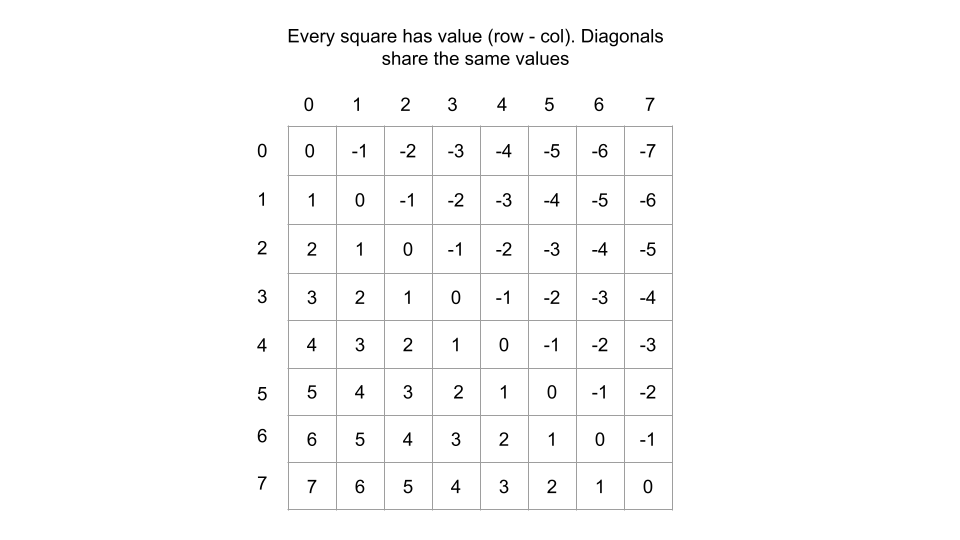

positive diagonal r+c
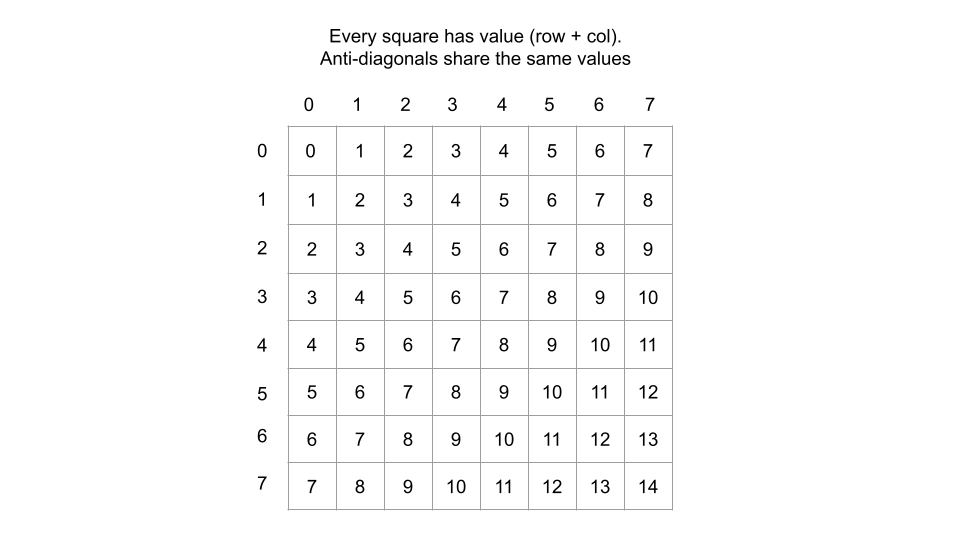

In [ ]:
from IPython.utils.py3compat import platform
def n_queens(n):
  result=[]
  col = set()
  pos_dig=set() # (r-c)
  neg_dia = set() # (r+c)

  board = [["."]*n for i in range(n)]


  def solve_n_queens(r):
    if r==n:
      copy = ["".join(row) for row in board]
      # print(col)
      result.append(copy)
      return
    for c in range(n):
      if c not in col and (r+c) not in pos_dig and (r-c) not in neg_dia:
        # continue
        col.add(c)
        pos_dig.add(r+c)
        neg_dia.add(r-c)
        board[r][c]='Q'

        solve_n_queens(r+1)

        col.remove(c)
        pos_dig.remove(r+c)
        neg_dia.remove(r-c)
        board[r][c]='.'

  solve_n_queens(0)
  return result


print(n_queens(4))

[['.Q..', '...Q', 'Q...', '..Q.'], ['..Q.', 'Q...', '...Q', '.Q..']]


## Suduko solver
- solve region
- solve global


In [ ]:
import itertools
import math
partial_assignment = [[0, 2, 6, 0, 0, 0, 8, 1, 0], \
         [3, 0, 0, 7, 0, 8, 0, 0, 6], \
         [4, 0, 0, 0, 5, 0, 0, 0, 7], \
         [0, 5, 0, 1, 0, 7, 0, 9, 0],\
         [0, 0, 3, 9, 0, 5, 1, 0, 0], \
         [0, 4, 0, 3, 0, 2, 0, 5, 0],\
         [1, 0, 0, 0, 3, 0, 0, 0, 2], \
         [5, 0, 0, 2, 0, 4, 0, 0, 9],\
         [0, 3, 8, 0, 0, 0, 4, 6, 0]]

# return a row
# print(partial_assignment[1])

# iterate a whole column
# for k in range(len(partial_assignment)):
#   print(partial_assignment[k][1])

def suduko_solver(partial_assignment):
  EMPTY_ENTRY = 0
  region_size = int(math.sqrt(len(partial_assignment)))

  def solve_partial_sudoku(i,j):
    if i==len(partial_assignment):
      i = 0
      j=j+1
      if j == len(partial_assignment):
        return True

    # we don't need to check if its not empty, as we cannot alter those,
    # so, we will check next position
    if partial_assignment[i][j] != EMPTY_ENTRY:
      return solve_partial_sudoku(i+1,j)

    # we are checking without adding val to (i,j)
    def valid_to_add(i,j,val):
      # check whole column j
      if any(val==partial_assignment[k][j] for k in range(len(partial_assignment))):
        return False
      # check row i
      if val in partial_assignment[i]:
        return False
      # region check

      I=i//region_size #i, j value could be (0,9) but region (0,2)(3,5)(6,8)
      J=j//region_size

      return not any (
          val == partial_assignment[region_size*I+a][region_size*J+b]
          for a, b in itertools.product(range(region_size), repeat=2)
      )

    # will try to add [1 to 9] value to the empty position
    for val in range(1, len(partial_assignment) + 1):
      # print("checking", i, j)
      if valid_to_add(i,j, val):
        partial_assignment[i][j]=val
        if solve_partial_sudoku(i+1,j):
          return True

    partial_assignment[i][j] = EMPTY_ENTRY
    return False

  return solve_partial_sudoku(0,0)

res = suduko_solver(partial_assignment)
print(res)

True


In [ ]:
import collections
class Solution:
    def solveSudoku(self, board: List[List[str]]) -> None:
        """
        Do not return anything, modify board in-place instead.
        """
        #we can create three set or dictionary to keep items for row, column and boxes or zone
        # we can use a queue/list to store those cell that need to process

        # we startd by popleft of the queue if it is valid, otherwise
        rows, cols, zones = collections.defaultdict(set), collections.defaultdict(set), collections.defaultdict(set)
        q=[]
        allowed_vals = [str(i) for i in range(1,10)]

        # fill the list q with empty cells locations as we need to fill those

        for r in range(len(board)):
            for c in range(len(board[0])):
                if (v := board[r][c]) == '.':
                    q.append((r,c))
                else:
                    rows[r].add(v)
                    cols[c].add(v)
                    zones[(r//3,c//3)].add(v)

        def dfs():
            if not q:
                return True

            r, c = q.pop()
            z = (r//3, c//3)

            for v in allowed_vals:
                if v not in cols[c] and v not in rows[r] and v not in zones[z]:
                    board[r][c] = v
                    rows[r].add(v)
                    cols[c].add(v)
                    zones[z].add(v)

                    if dfs():
                        return True

                    board[r][c]='.'
                    rows[r].discard(v)
                    cols[c].discard(v)
                    zones[z].discard(v)
            q.append((r,c))
            return False

        dfs()

0 0
0 1
0 2
1 0
1 1
1 2
2 0
2 1
2 2


## Gray code


In [ ]:
# grey code backtracking solution
def grey_code(num_bits):
  def directed_gray_code(history):
    def differs_by_one(x,y):
      bit_diff= x^y
      return bit_diff and not (bit_diff & (bit_diff-1))


    if len(result) == 1 << num_bits:
        return differs_by_one(result[0], result[-1]) # check cyclic

    for i in range(num_bits):
        prev_code = result[-1]
        # generate next candidate by flipping one position starting from LSB
        # 1, 10, 100 xored with previous value
        next_candidate_code = prev_code ^ (1<<i)
        print(history)
        if next_candidate_code not in history:
          history.add(next_candidate_code)
          result.append(next_candidate_code)
          if directed_gray_code(history):
            return True
          history.remove(next_candidate_code)
          del result[-1]
    return False

  result=[0]
  directed_gray_code(set([0]))
  return result

print(grey_code(3))

{0}
{0, 1}
{0, 1}
{0, 1, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3}
{0, 1, 2, 3, 6}
{0, 1, 2, 3, 6, 7}
{0, 1, 2, 3, 6, 7}
{0, 1, 2, 3, 5, 6, 7}
[0, 1, 3, 2, 6, 7, 5, 4]


## Bit different by one
3=11, 4=100
3^4= 011 XOR 100 =111=7-1=6=110 & 111=001
100^111 =011  

In [ ]:
def differ_by_one_place(x, y):
  print(bin(x), bin(y))
  bit_diff = x ^ y
  print(bit_diff, bit_diff-1, not (bit_diff & (bit_diff-1)))
  return bit_diff and not (bit_diff & (bit_diff-1))

print(differ_by_one_place(3,4))
print(differ_by_one_place(3,2))

def generate_next_candidate(candidate, size):
  print(bin(candidate)[3:])
  next_candidate = candidate ^ (1 << size)
  print(bin(next_candidate))
  print(next_candidate)

generate_next_candidate(3,3)
generate_next_candidate(4,3)

0b11 0b100
7 6 False
False
0b11 0b10
1 0 True
True
1
0b1011
11
00
0b1100
12


In [ ]:
# Grey code analytical solution
def grey_code(num_bits):
  if num_bits ==0:
    return [0]
  grey_code_num_of_bit_minus_1 = grey_code(num_bits-1)
  print("step result", grey_code_num_of_bit_minus_1)
  leading_bit_1 = 1 << (num_bits-1)
  print(bin(leading_bit_1))
  return grey_code_num_of_bit_minus_1 + [leading_bit_1 | i for i in reversed(grey_code_num_of_bit_minus_1)]
print(grey_code(3))

step result [0]
0b1
step result [0, 1]
0b10
step result [0, 1, 3, 2]
0b100
[0, 1, 3, 2, 6, 7, 5, 4]


# Grey code (best solution)

In [ ]:
class Solution:
    def grayCode(self, n: int) -> List[int]:
        l = 1 << n
        res=[]
        for i in range(l):
            num = i ^ i >> 1
            print(bin(i), bin(num))
            res.append(num)
        return res

In [ ]:
class BTN:
  def __init__(self,val, left, right):
    self.val = val
    self.left = left
    self.right = right

def generate_all_binary_tree(num_nodes):
  if num_nodes==0:
    return [None]
  result = []
  for num_of_left_nodes in range(num_nodes):
    num_right_tree_nodes = num_nodes -1 - num_of_left_nodes
    left_subtree = generate_all_binary_tree(num_of_left_nodes)
    right_subtree = generate_all_binary_tree(num_right_tree_nodes)
    result += [
        BTN(0, left, right)
        for left in left_subtree for right in right_subtree
        ]
  return result
res = generate_all_binary_tree(3)
print(len(res))

5


## Letter combination of numbers

In [ ]:
class Solution:
        def letterCombinations(self, digits: str) -> List[str]:
            digToChar = {
                '2' : "abc",
                '3' : "def",
                '4' : "ghi",
                '5' : "jkl",
                '6' : "mno",
                '7' : "pqrs",
                '8' : "tuv",
                '9' : "wxyz"
            }

            if not digits:
                return []
            res = []
            def backtrack(i, curStr):
                if len(digits) == len(curStr):
                    res.append(''.join(curStr))
                    return
                #concept is to run the twich, get the string and for eac char, do that operation
                for c in digToChar[digits[i]]:
                        curStr+=c
                        backtrack(i+1, curStr)
                        curStr=curStr[:-1]

            backtrack(0, "")
            return res

## Morse code encoder and decoder


In [ ]:
encode_table = {
    "A": ".-",
    "B": "-...",
    "C": "-.-.",
    "D": "-..",
    "E": ".",
    "F": "..-.",
    "G": "--.",
    "H": "....",
    "I": "..",
    "J": ".---",
    "K": "-.-",
    "L": ".-..",
    "M": "--",
    "N": "-.",
    "O": "---",
    "P": ".--.",
    "Q": "--.-",
    "R": ".-.",
    "S": "...",
    "T": "-",
    "U": "..-",
    "V": "...-",
    "W": ".--",
    "X": "-..-",
    "Y": "-.--",
    "Z": "--..",
    "0": "-----",
    "1": ".----",
    "2": "..---",
    "3": "...--",
    "4": "....-",
    "5": ".....",
    "6": "-....",
    "7": "--...",
    "8": "---..",
    "9": "----.",
    ".": ".-.-.-",
    ",": "--..--",
    "?": "..--..",
    " ": "SPACE",
}

# Reverse of encode_table.
decode_table = {v: k for k, v in encode_table.items()}

def encode(s):
    enc = " ".join(encode_table[x] for x in s)
    return enc.replace(" SPACE ", "   ")

def decode(encoded):
    symbols = encoded.replace("   ", " SPACE ").split(" ")
    return "".join(decode_table[x] for x in symbols)

print(encode("HEY JUDE"))
print(decode(".... . -.--   .--- ..- -.. ."))

# what if the code is not spaced seperated

.... . -.--   .--- ..- -.. .
HEY JUDE


## Combination sum II ( repeated support)

In [ ]:
class Solution:
    def combinationSum2(self, candidates: List[int], target: int) -> List[List[int]]:
        res=[]
        candidates.sort()
        counter = collections.Counter(candidates)

        def backtrack(cur_pos, cnt, temp, t):
            if t==0:
                res.append(temp.copy())
                return
            elif t < 0:
                return


            for next_cur in range(cur_pos, len(candidates)):
                if cnt[candidates[next_cur]] ==0:
                    continue

                temp.append(candidates[next_cur])
                cnt[candidates[next_cur]] -=1
                backtrack(next_cur+1, cnt, temp, t-candidates[next_cur])
                temp.pop()
                cnt[candidates[next_cur]] +=1
        backtrack(0,counter,[],target)
        return res

## [797](https://leetcode.com/problems/all-paths-from-source-to-target/description/) all path source to dest (graph problem mainly)
Given a directed acyclic graph (DAG) of n nodes labeled from 0 to n - 1, find all possible paths from node 0 to node n - 1 and return them in any order.

The graph is given as follows: graph[i] is a list of all nodes you can visit from node i (i.e., there is a directed edge from node i to node graph[i][j]).



- Example 1:
```python
Input: graph = [[1,2],[3],[3],[]]
Output: [[0,1,3],[0,2,3]]
Explanation: There are two paths: 0 -> 1 -> 3 and 0 -> 2 -> 3.
```
- Example 2:
```python
Input: graph = [[4,3,1],[3,2,4],[3],[4],[]]
Output: [[0,4],[0,3,4],[0,1,3,4],[0,1,2,3,4],[0,1,4]]

```

In [ ]:
from typing import List
import collections
# a simple dfs or backtrack
class Solution:
    def allPathsSourceTarget(self, graph: List[List[int]]) -> List[List[int]]:
        g = collections.defaultdict(list)

        for i in range(len(graph)):
                g[i] += graph[i]


        path = [0]
        res=[]
        # q = collections.deque([0])
        dest = len(graph)-1

        def backtrack(node):
            if node == dest:
                res.append(list(path))
                return

            for next_node in g[node]:
                path.append(next_node)
                backtrack(next_node)
                path.remove(next_node)
        backtrack(0)
        return res
graph = [[4,3,1],[3,2,4],[3],[4],[]]
print(Solution().allPathsSourceTarget(graph))

[[0, 4], [0, 3, 4], [0, 1, 3, 4], [0, 1, 2, 3, 4], [0, 1, 4]]


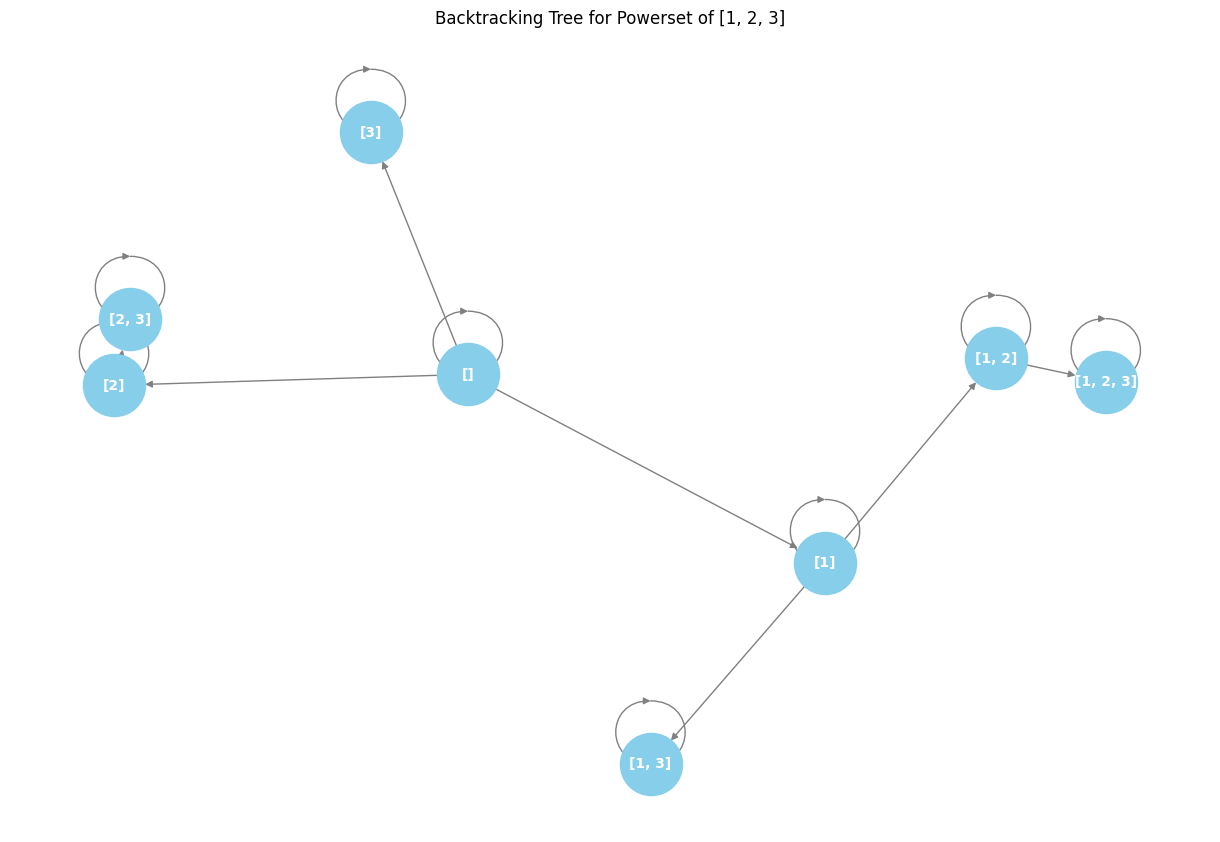

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def backtrack_power_set(nums, subset, idx, G, parent):
    if idx == len(nums):
        # Add the subset as a leaf node
        node_label = str(subset)
        G.add_node(node_label)
        G.add_edge(parent, node_label)
        return

    # Include the current element
    include = subset + [nums[idx]]
    node_label_include = str(include)
    G.add_node(node_label_include)
    G.add_edge(parent, node_label_include)
    backtrack_power_set(nums, include, idx + 1, G, node_label_include)

    # Exclude the current element
    exclude = subset[:]
    node_label_exclude = str(exclude)
    G.add_node(node_label_exclude)
    G.add_edge(parent, node_label_exclude)
    backtrack_power_set(nums, exclude, idx + 1, G, node_label_exclude)

# Input set
nums = [1, 2, 3]

# Create a graph and start backtracking from the root node
G = nx.DiGraph()
root = "[]"
G.add_node(root)
backtrack_power_set(nums, [], 0, G, root)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, font_size=10, font_color='white', node_color='skyblue', font_weight='bold', edge_color='gray')
plt.title("Backtracking Tree for Powerset of [1, 2, 3]")
plt.show()

The **Partition Equal Subset Sum** problem on LeetCode is a classic problem that can be solved using backtracking.

---

### **Problem Statement**
Given a non-negative integer array `nums`, determine if it can be partitioned into two subsets such that the sum of elements in both subsets is equal.

#### **Constraints**
- Each number in the array will not exceed 100.
- The array size will not exceed 200.

---

### **Key Observations**
1. **Sum Check**: If the total sum of the array is odd, it's impossible to partition it into two equal subsets.
2. **Subset Sum Target**: If the total sum is even, the goal is to find if there's a subset of `nums` that sums to `target = total_sum // 2`.

---

### **Backtracking Approach**

#### **Thought Process**
1. Use recursion to explore combinations of array elements.
2. Track the current sum as you pick elements.
3. If the current sum equals `target`, return `True`.
4. Prune invalid paths:
   - If the current sum exceeds `target`, stop exploring further.
   - Avoid reusing elements already included in the current subset.

#### **Algorithm**
1. Sort the array in descending order to attempt larger numbers first, which helps in pruning.
2. Use backtracking to explore subsets.

---

### **Code Implementation**

```python
def canPartition(nums):
    total_sum = sum(nums)
    # If the total sum is odd, it cannot be partitioned
    if total_sum % 2 != 0:
        return False
    
    target = total_sum // 2
    nums.sort(reverse=True)  # Sorting helps to prune early
    
    def backtrack(index, current_sum):
        # Base case: found a subset with the target sum
        if current_sum == target:
            return True
        # Base case: current sum exceeds target or no elements left
        if current_sum > target or index >= len(nums):
            return False
        
        # Choose the current number and move forward
        if backtrack(index + 1, current_sum + nums[index]):
            return True
        
        # Skip the current number and move forward
        return backtrack(index + 1, current_sum)
    
    # Start the backtracking process
    return backtrack(0, 0)
```

---

### **Example Walkthrough**

#### Input
`nums = [1, 5, 11, 5]`

#### Step-by-Step Execution
1. **Initial Checks**:
   - Total sum = \(1 + 5 + 11 + 5 = 22\).
   - Target = \(22 / 2 = 11\).
   - Sorted `nums = [11, 5, 5, 1]`.

2. **Backtracking**:
   - Start at index 0, `current_sum = 0`.
     - Include `11`: \(current\_sum = 11\). Match found → return `True`.

#### Output
`True`

---

### **Time Complexity**
- \(O(2^n)\) in the worst case (all subsets are explored).
- Pruning significantly reduces the search space in practice.

### **Space Complexity**
- \(O(n)\) due to recursion stack.

---

### **Why Use Backtracking Here?**
Backtracking systematically explores possible subsets, pruning invalid paths early (e.g., when the current sum exceeds the target). While dynamic programming is typically more efficient, backtracking provides an intuitive and recursive approach for subset problems.